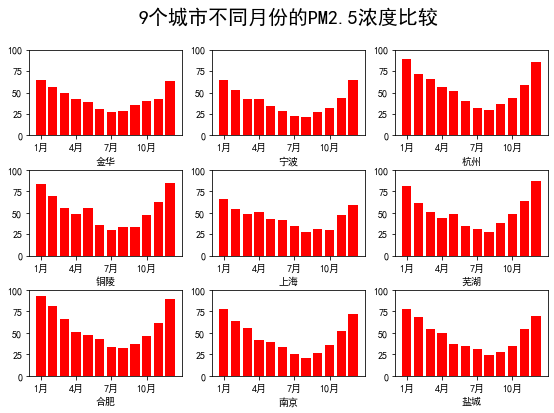

In [1]:
# 绘制条形图
# 设置在notebook显示
%matplotlib inline

# 导入模块
import numpy as np
import matplotlib.pyplot as plt

# # 解决不能输出中文的问题。不区分大小写，即SimHei’效果等价于‘simhei’，中括号可以不要

plt.rcParams["font.family"] = "SimHei"

# 导入数据
xlabels = ["金华","宁波","杭州","铜陵","上海","芜湖","合肥","南京","盐城"]
x = range(1,13)
data = np.array([[65,56,49,43,39,31,27,29,35,40,43,63],[64,53,43,42,34,29,23,21,27,32,44,65],[89,72,66,57,52,40,32,30,37,44,59,85],[83,69,56,49,56,36,30,33,33,47,62,85],[66,54,48,51,43,41,35,28,31,30,47,59],[81,61,51,44,48,35,31,28,38,49,64,87],[93,81,66,51,47,43,34,32,37,46,62,90],[78,64,56,42,39,34,25,21,26,36,52,72],[78,69,55,50,37,35,31,24,28,35,54,70]])

# 新建画布，大小800*600,循环绘制子图
fig = plt.figure(figsize=(8,6))
for i in range(9):
    ax = fig.add_subplot(3,3,i+1)  # 添加子图
    plt.xlabel(xlabels[i],size=10) # 设置x轴标题为各个城市名
    y = data[i]                    # y轴数据
    plt.ylim(0,100)                # y轴边界
    plt.xticks([1,4,7,10],["1月","4月","7月","10月"],size=10) # 设置x轴间距\标签
    plt.bar(x,y,color="r")         # 绘制条形图 
plt.suptitle("9个城市不同月份的PM2.5浓度比较",size=20)   # 添加标题
plt.subplots_adjust(left=0.05,right=0.95,hspace=0.4)     # 调整子图间距

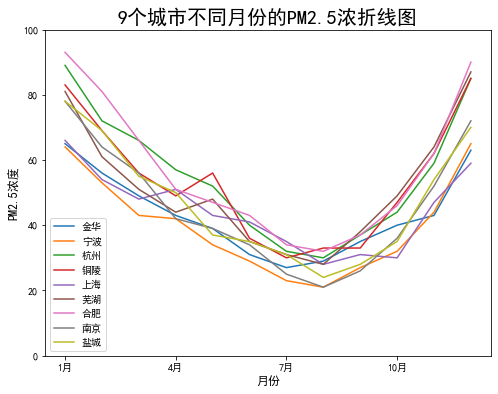

In [2]:
# 绘制折线图

# 新建画布,大小800*600
fig = plt.figure(figsize=(8,6))

# 循环绘制各个城市折线图
for i in range(9):
    plt.plot(x, data[i], label=xlabels[i])
plt.xlabel("月份",size=12)       # 设置x轴标题
plt.ylabel("PM2.5浓度",size=12)  # 设置y轴标题
plt.ylim(0,100)
plt.xticks([1,4,7,10],["1月","4月","7月","10月"],size=10) # 设置x轴刻度标签
plt.title("9个城市不同月份的PM2.5浓折线图", size=20)      # 添加标题

# 设置图例并设置位置左下角
plt.legend(loc=3)   

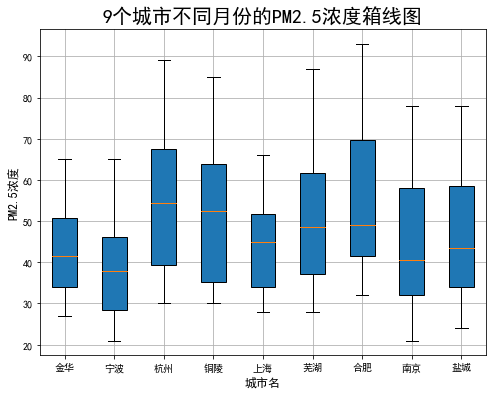

In [3]:
# 绘制箱线图

# 新建画布，1行1列。大小800*600
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))

# 绘制箱线图
ax1.boxplot(data.T,  # 数据转置以每个城市12个月数据为列
            patch_artist=True,  # 填充颜色
            vert=True,   # 垂直箱线图
            labels=xlabels)  # 箱线图每个系列标签

# 添加标题、轴标题
ax1.set_title("9个城市不同月份的PM2.5浓度箱线图", size=20)
ax1.set_xlabel('城市名',size=12)
ax1.set_ylabel('PM2.5浓度' ,size=12)

# 开启网格
plt.grid(True)

([<matplotlib.axis.XTick at 0x2636785c7f0>,
 [Text(1, 0, '1月'), Text(4, 0, '4月'), Text(7, 0, '7月'), Text(10, 0, '10月')])

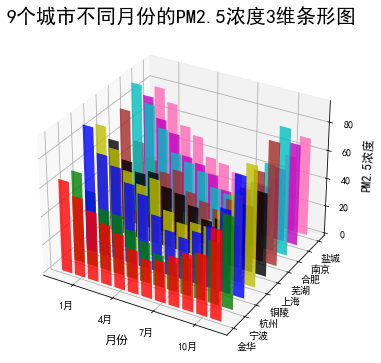

In [4]:
# 绘制3维条形图

# 新建画布,大小800*600，设置为3d
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(projection='3d')

# 建立各个城市颜色，设置城市数量
colors = ['r', 'g', 'b', 'y','k', 'brown', 'c', 'm', 'hotpink']
yticks = range(0,9)

# 循环绘制每个城市条形图
for c, k in zip(colors, yticks):
    # 建立x轴，y轴
    xs = np.arange(12)
    ys = data[k]

    # 绘制条形图，xs，ys，zs为坐标轴，zdir为数据系列所在轴，透明度设置0.8
    ax.bar(xs, ys, zs=k, zdir='y', color=c, alpha=0.8)

# 设置标题与轴标题
ax.set_title("9个城市不同月份的PM2.5浓度3维条形图", size=20)
ax.set_xlabel('月份',size=12)
ax.set_zlabel('PM2.5浓度',size=12)

# 设置轴刻度标签
plt.yticks(yticks,xlabels)
plt.xticks([1,4,7,10],["1月","4月","7月","10月"])

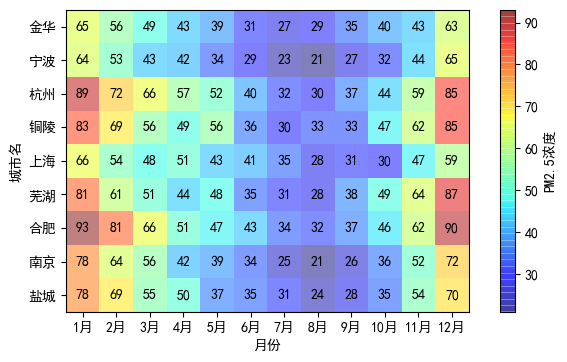

In [5]:
# 绘制标记热力图
# 导入模块
import csv
import numpy as np
import matplotlib.pyplot as plt


# 使用读取 csv 表格的形式获取绘图数据
tables = []
with open('pm25.csv', 'r', encoding='utf-8') as f:
     reader = csv.reader(f)
    
     for row in reader:
        tables.append(row)

f.close()

# 参照示例改写代码
# https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html
cities = np.array(tables)
city_names = cities[:,0]
month = [str(i) + '月' for i in range(1,13)]
pm25 = cities[:,1:].astype(np.int16)

plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(8, 4), dpi=100)
plt.imshow(pm25, cmap='jet', alpha=0.5)
plt.colorbar(label='PM2.5浓度')
plt.yticks(np.arange(len(city_names)), city_names) # y: 0-8
plt.xlabel('月份')
plt.ylabel('城市名')
plt.xticks(np.arange(len(month)), month) # x: 0-11

# Loop over data dimensions and create text annotations.
for i in range(len(month)):
    for j in range(len(city_names)):
        text = plt.text(i, j, pm25[j, i],
                       ha="center", va="center", color="k")

plt.show()